In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint


In [2]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.5/924.5 kB 13.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
data = pd.read_excel("/content/drive/MyDrive/output.xlsx")
data

,FromNode,ToNode
0,0,1
1,0,4
2,0,5
3,0,8
4,0,11
...,...,...
420040,265209,422
420041,265210,422
420042,265211,192
420043,265212,875


In [15]:
data=data.head(80000)
data

,FromNode,ToNode
0,0,1
1,0,4
2,0,5
3,0,8
4,0,11
...,...,...
79995,1815,149239
79996,1815,150988
79997,1815,152981
79998,1815,156778


In [16]:
G = nx.from_pandas_edgelist(data, "FromNode", "ToNode")

n = len(G)
m = len(G.edges())
n, m


(41296, 72799)

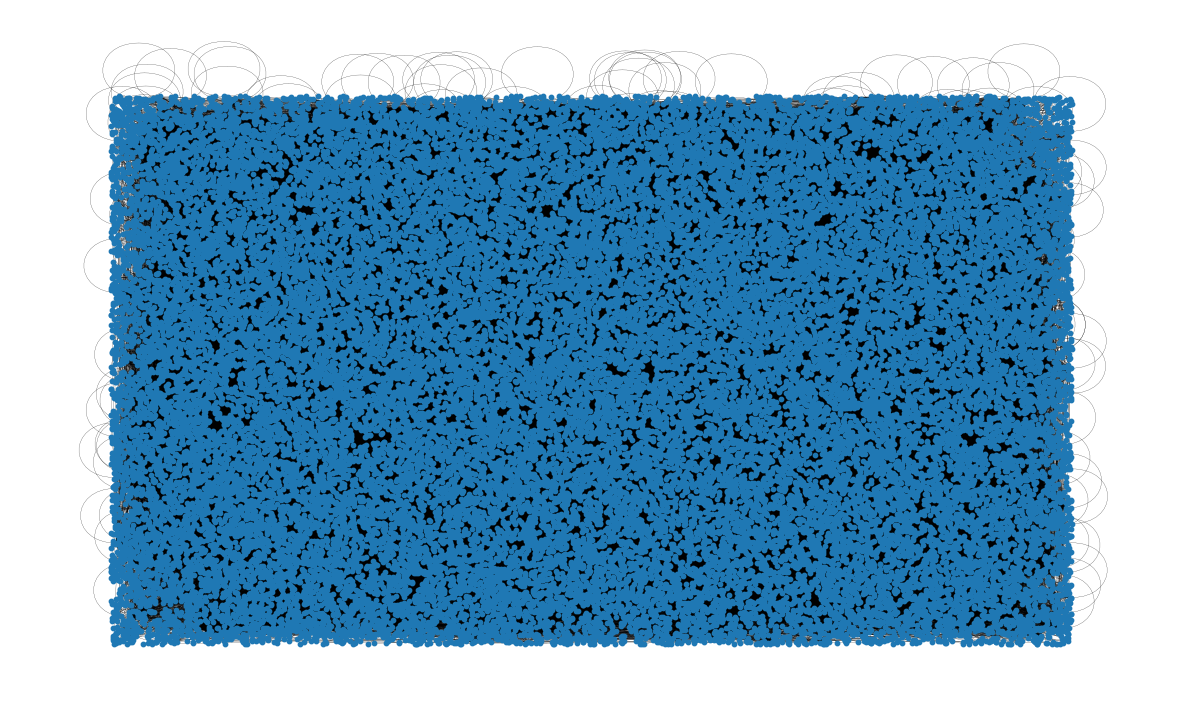

In [17]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

In [80]:
pos = nx.spring_layout(G)


In [81]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)


In [141]:
max_betCent = max(betCent.values())
min_betCent = min(betCent.values())
normalized_between_centrality = {
    node: (centrality - min_betCent) / (max_degree_centrality - min_betCent)
    for node, centrality in betCent.items()
}

# Set alpha based on normalized degree centrality
node_bet_alpha = [0.2 + 0.8 * normalized_between_centrality[node] for node in G.nodes()]

(-1.0884253880381585,
 1.1071461936831475,
 -1.0798072977364064,
 1.2674263967573645)

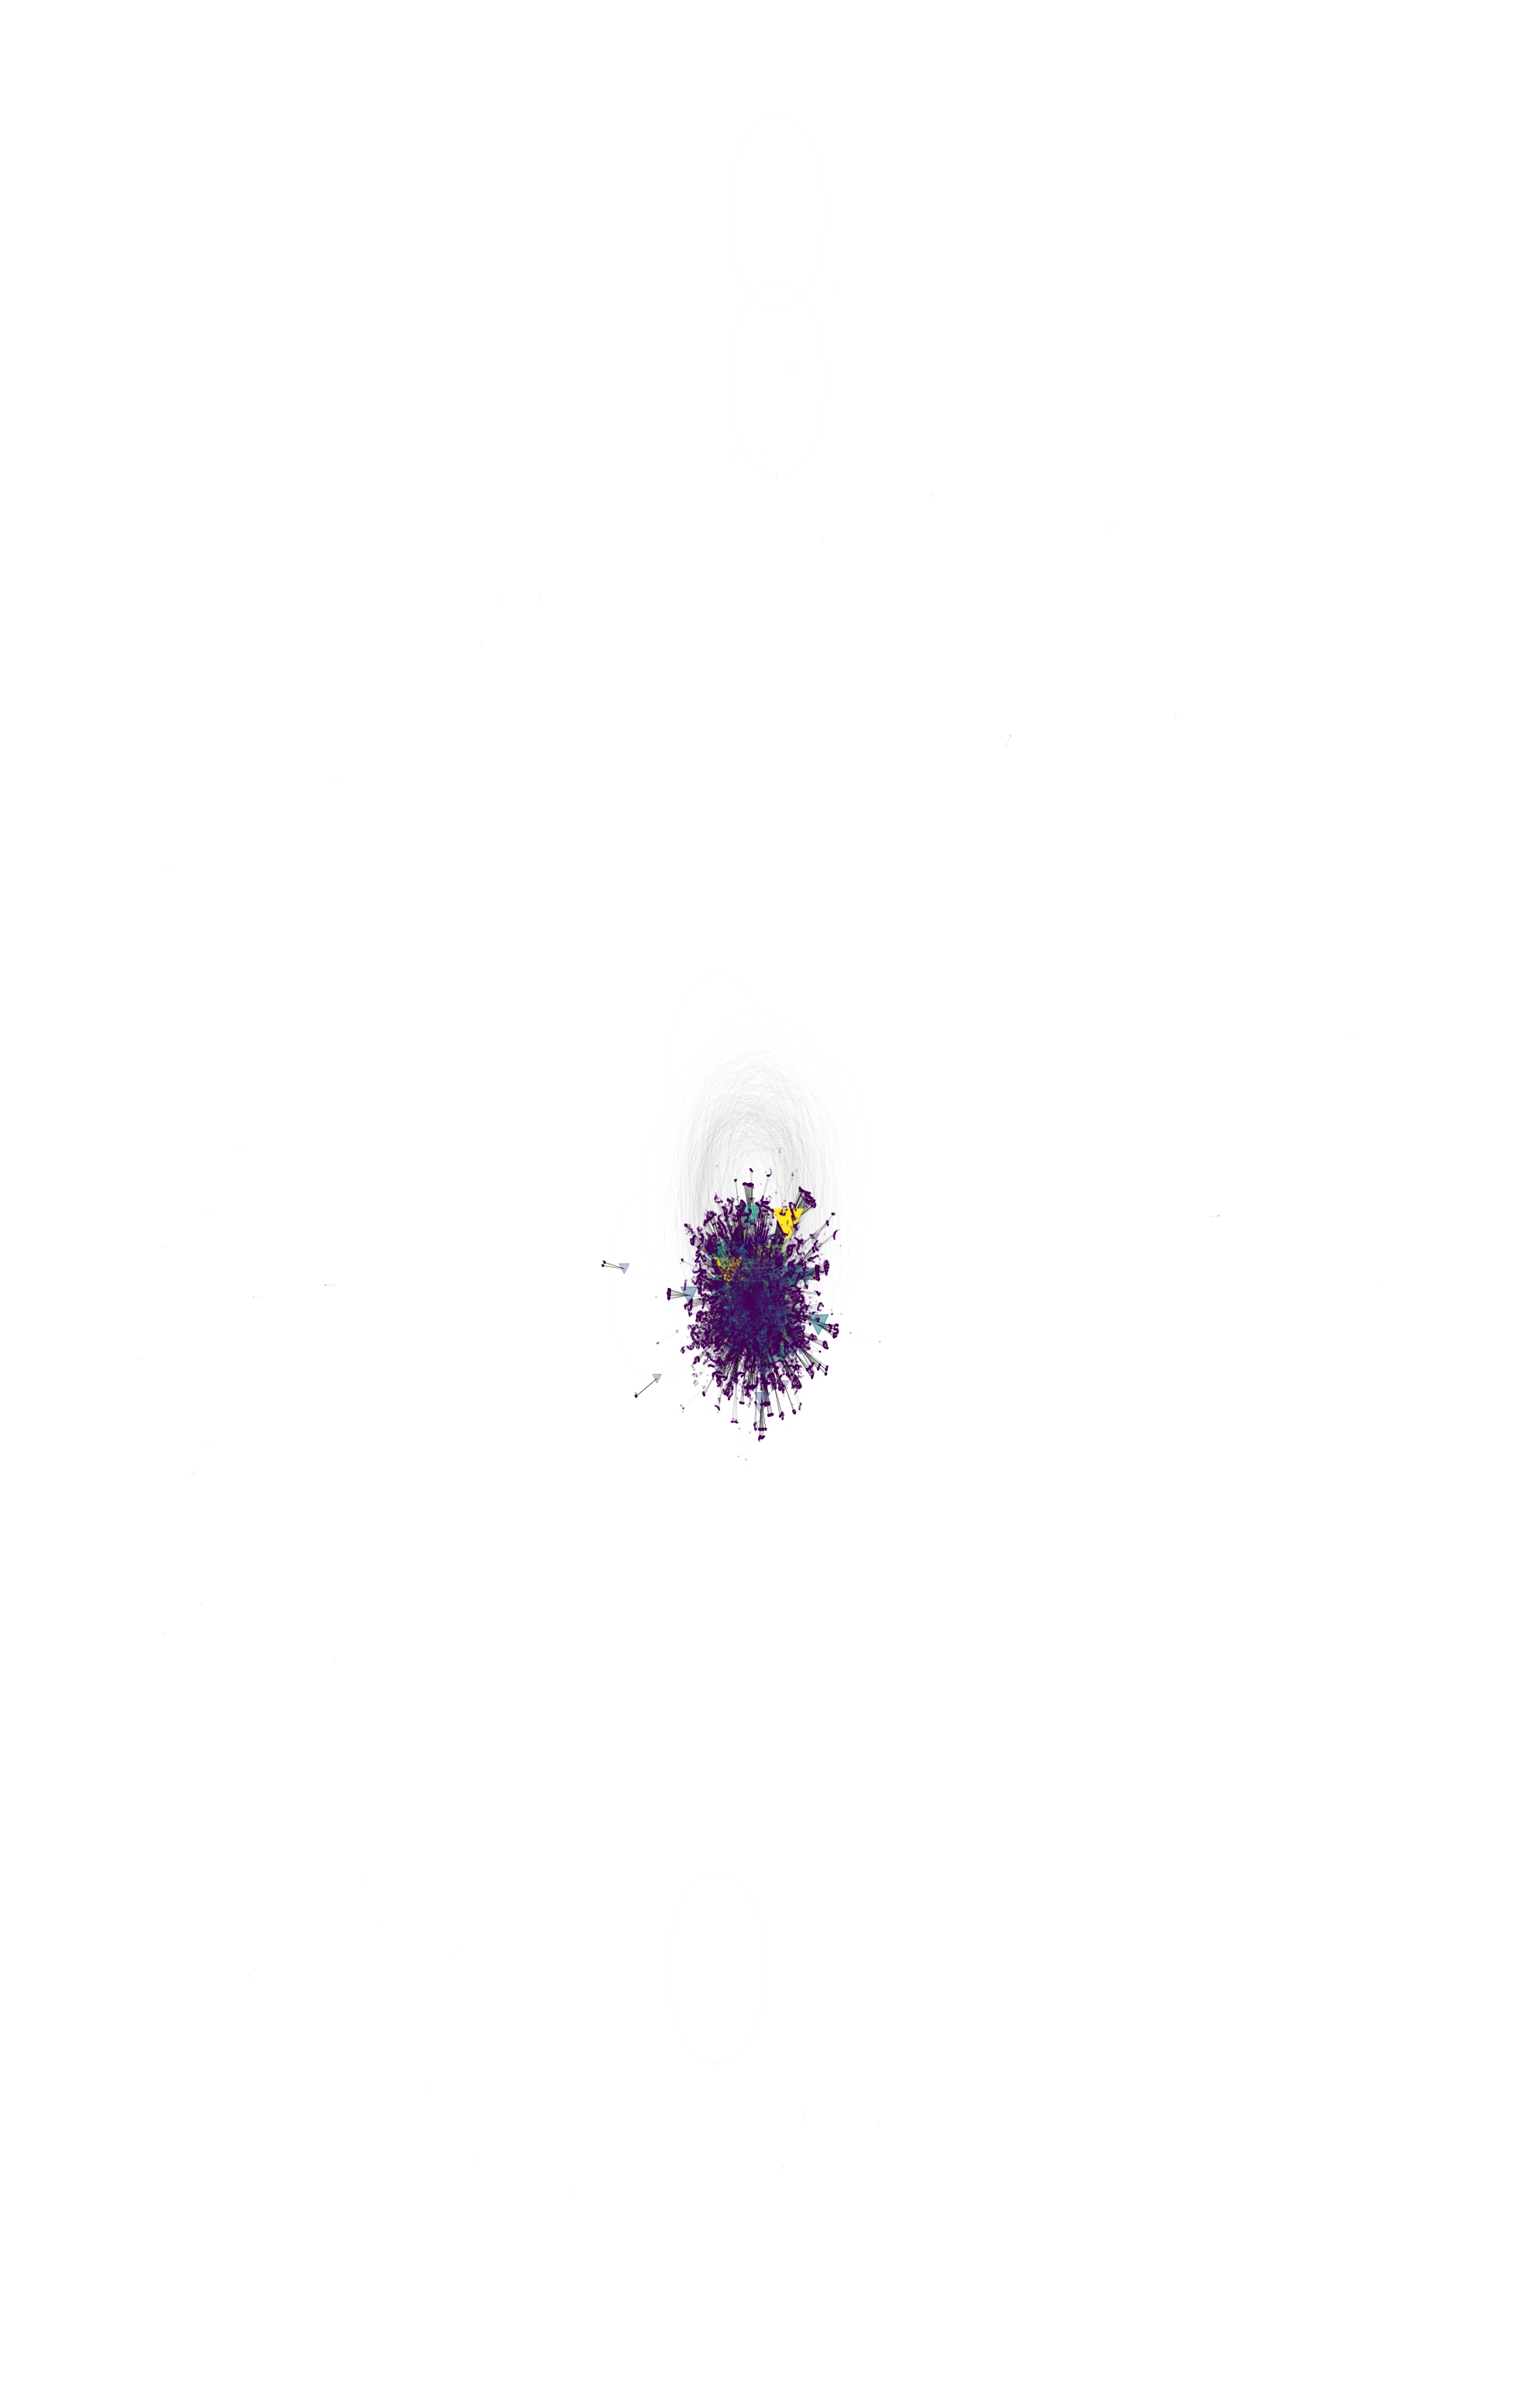

In [149]:
node_color = [1000.0 * G.degree(v) for v in G]
node_size =  [v * 20000 for v in betCent.values()]
plt.figure(figsize=(25,40))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size,
                 alpha=node_alpha,
                 node_shape="v",
                 width=0.04)
plt.axis('off')

In [92]:
#Total number of nodes in network
G.number_of_nodes()


41296

In [18]:
#Total number of edges
G.number_of_edges()

72799

In [102]:
np.mean([d for _, d in G.degree()])

3.525716776443239

In [93]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(83, 0.022787262380433465),
 (868, 0.021358517980385034),
 (192, 0.021164789926141177),
 (10, 0.019082213343019735),
 (1417, 0.017144932800581183),
 (818, 0.01644266860394721),
 (240, 0.016297372563264318),
 (104, 0.01622472454292287)]

In [143]:
max_degree_centrality = max(degree_centrality.values())
min_degree_centrality = min(degree_centrality.values())
normalized_degree_centrality = {
    node: (centrality - min_degree_centrality) / (max_degree_centrality - min_degree_centrality)
    for node, centrality in degree_centrality.items()
}

# Set alpha based on normalized degree centrality
node_alpha = [0.2 + 0.8 * normalized_degree_centrality[node] for node in G.nodes()]

(-1.0884253880381585,
 1.1071461936831475,
 -1.0798072977364064,
 1.2674263967573645)

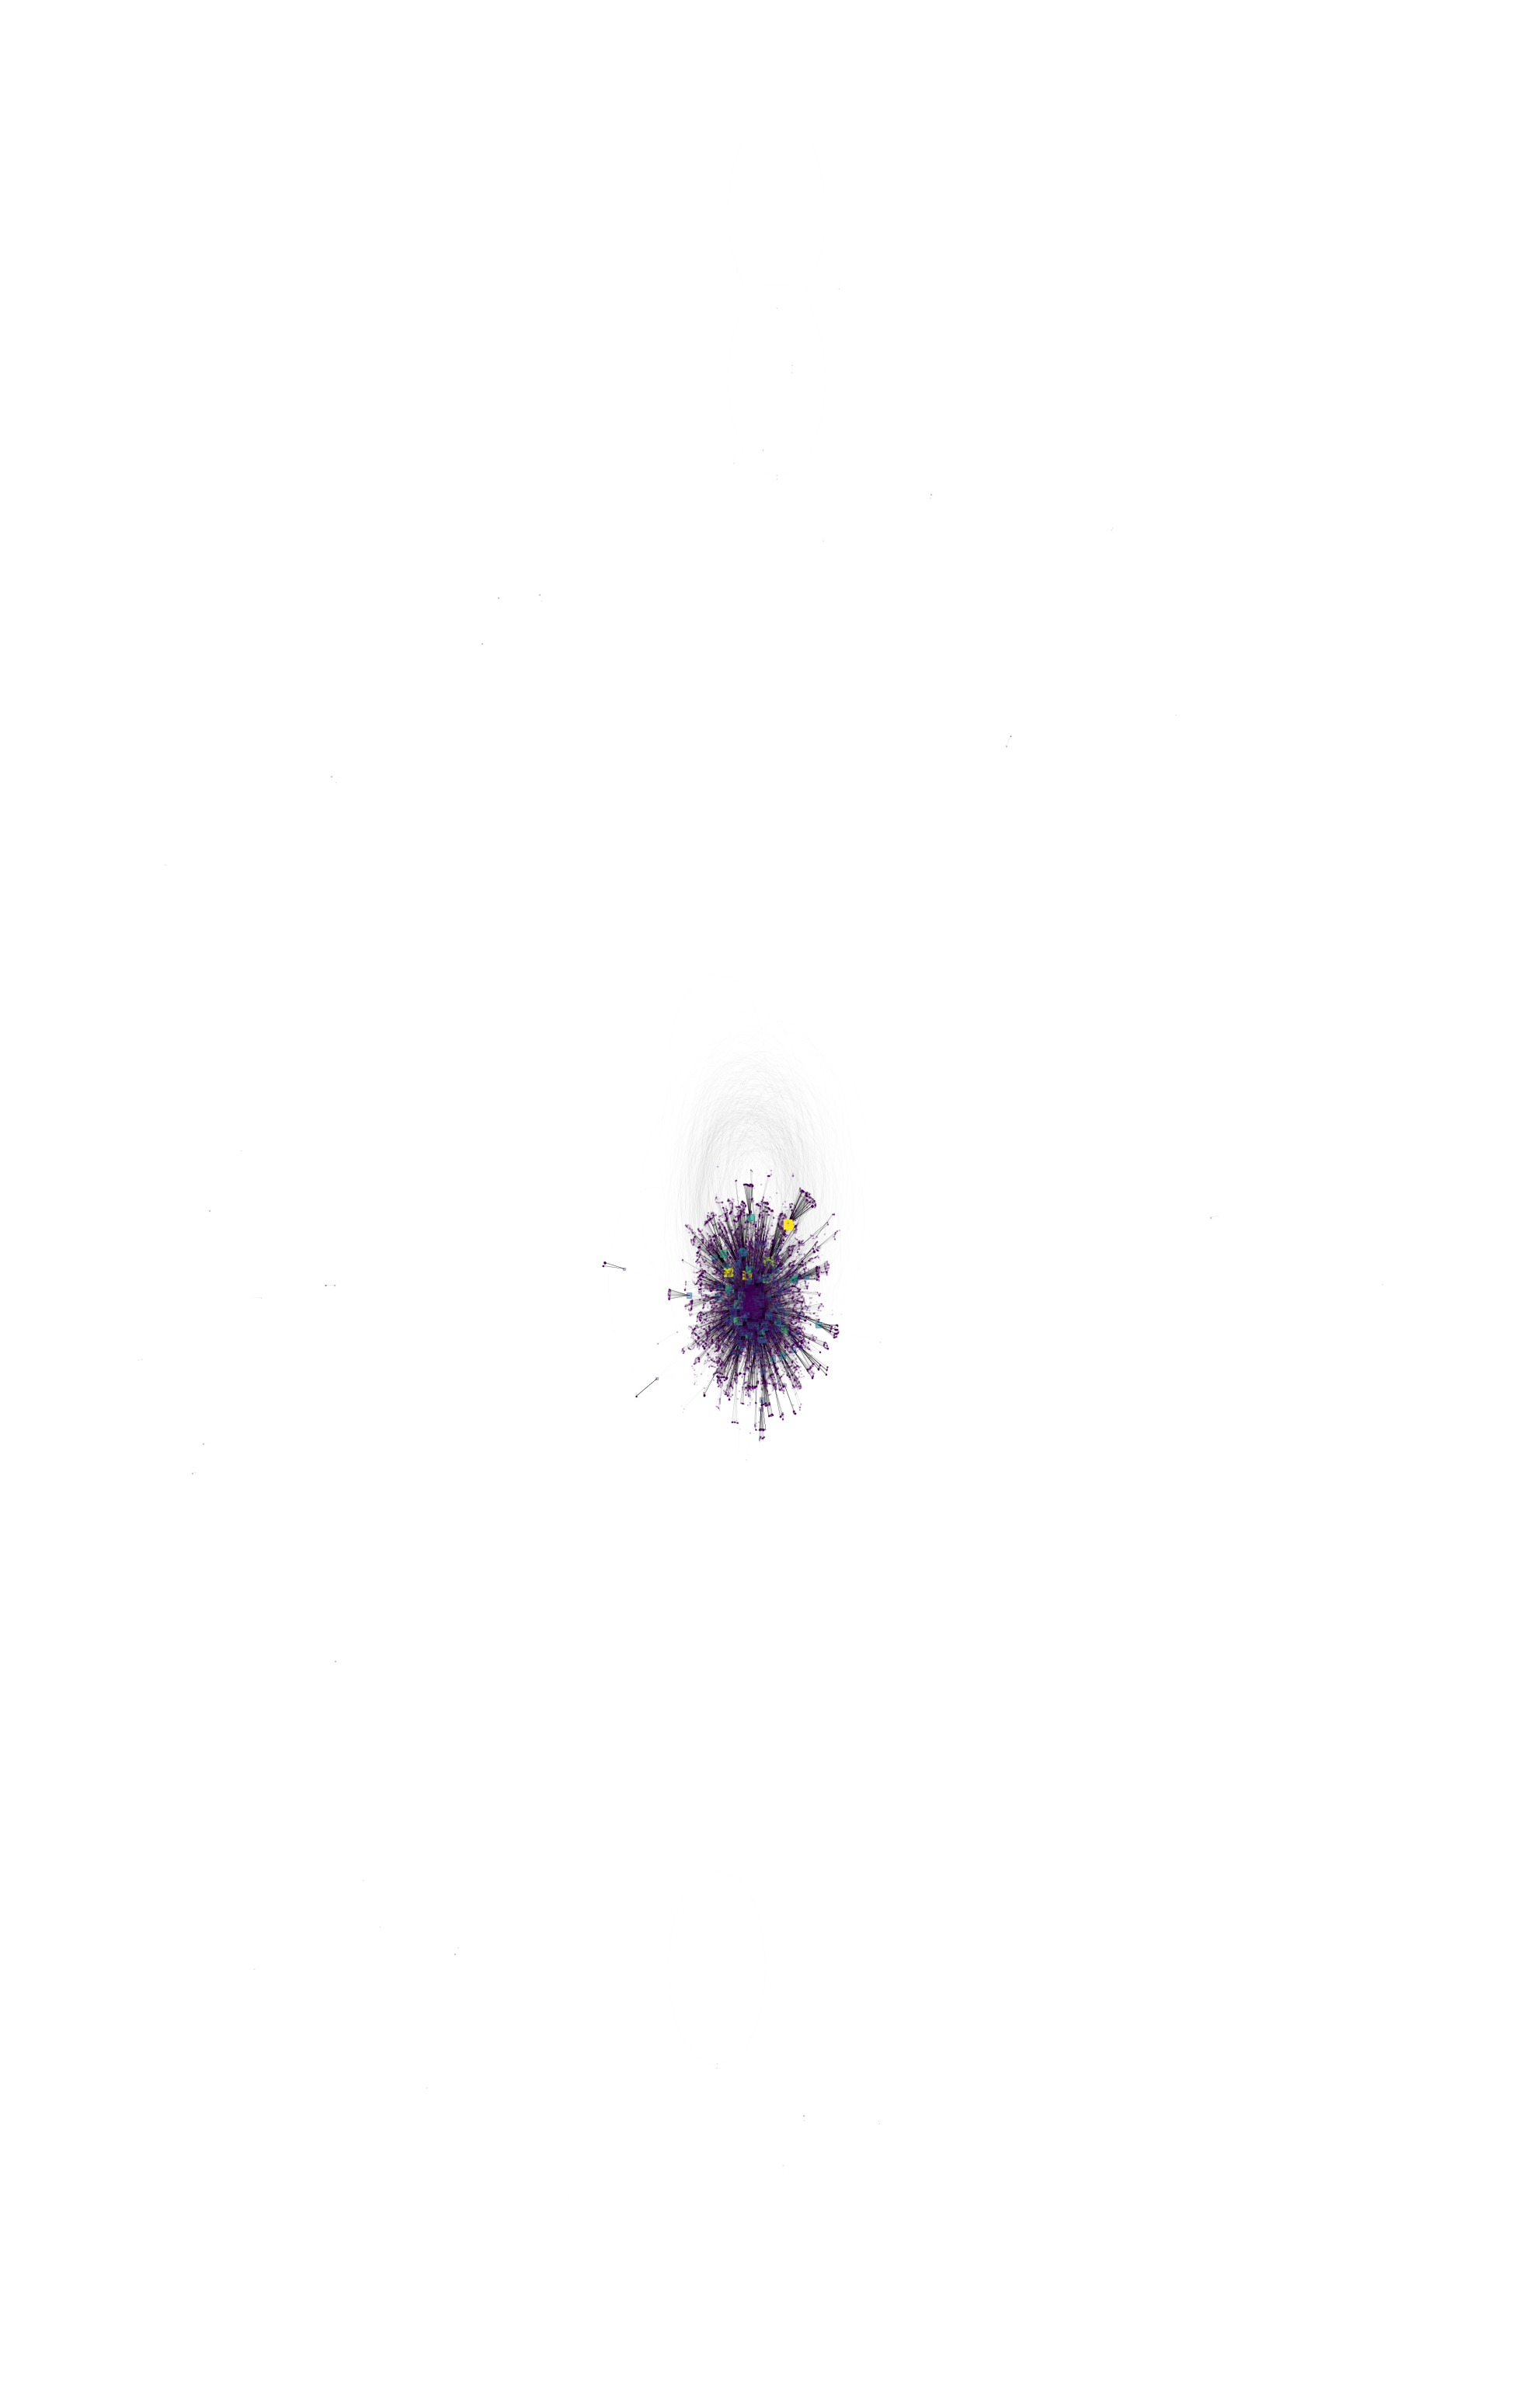

In [148]:
node_color = [9000 * G.degree(v) for v in G]
node_size = [
    v * 3000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(25, 40))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, with_labels=False, width=0.03, node_shape="s", alpha=node_alpha)
plt.axis("off")

In [103]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(1011, 0.06801797617874829),
 (10, 0.04842463099852254),
 (83, 0.04002946283356045),
 (192, 0.038352062181876194),
 (852, 0.037155653893634344),
 (868, 0.03341292473129717),
 (818, 0.031237366410211773),
 (1417, 0.029548421873192756)]

(-1.0884253880381585,
 1.1071461936831475,
 -1.0798072977364064,
 1.2674263967573645)

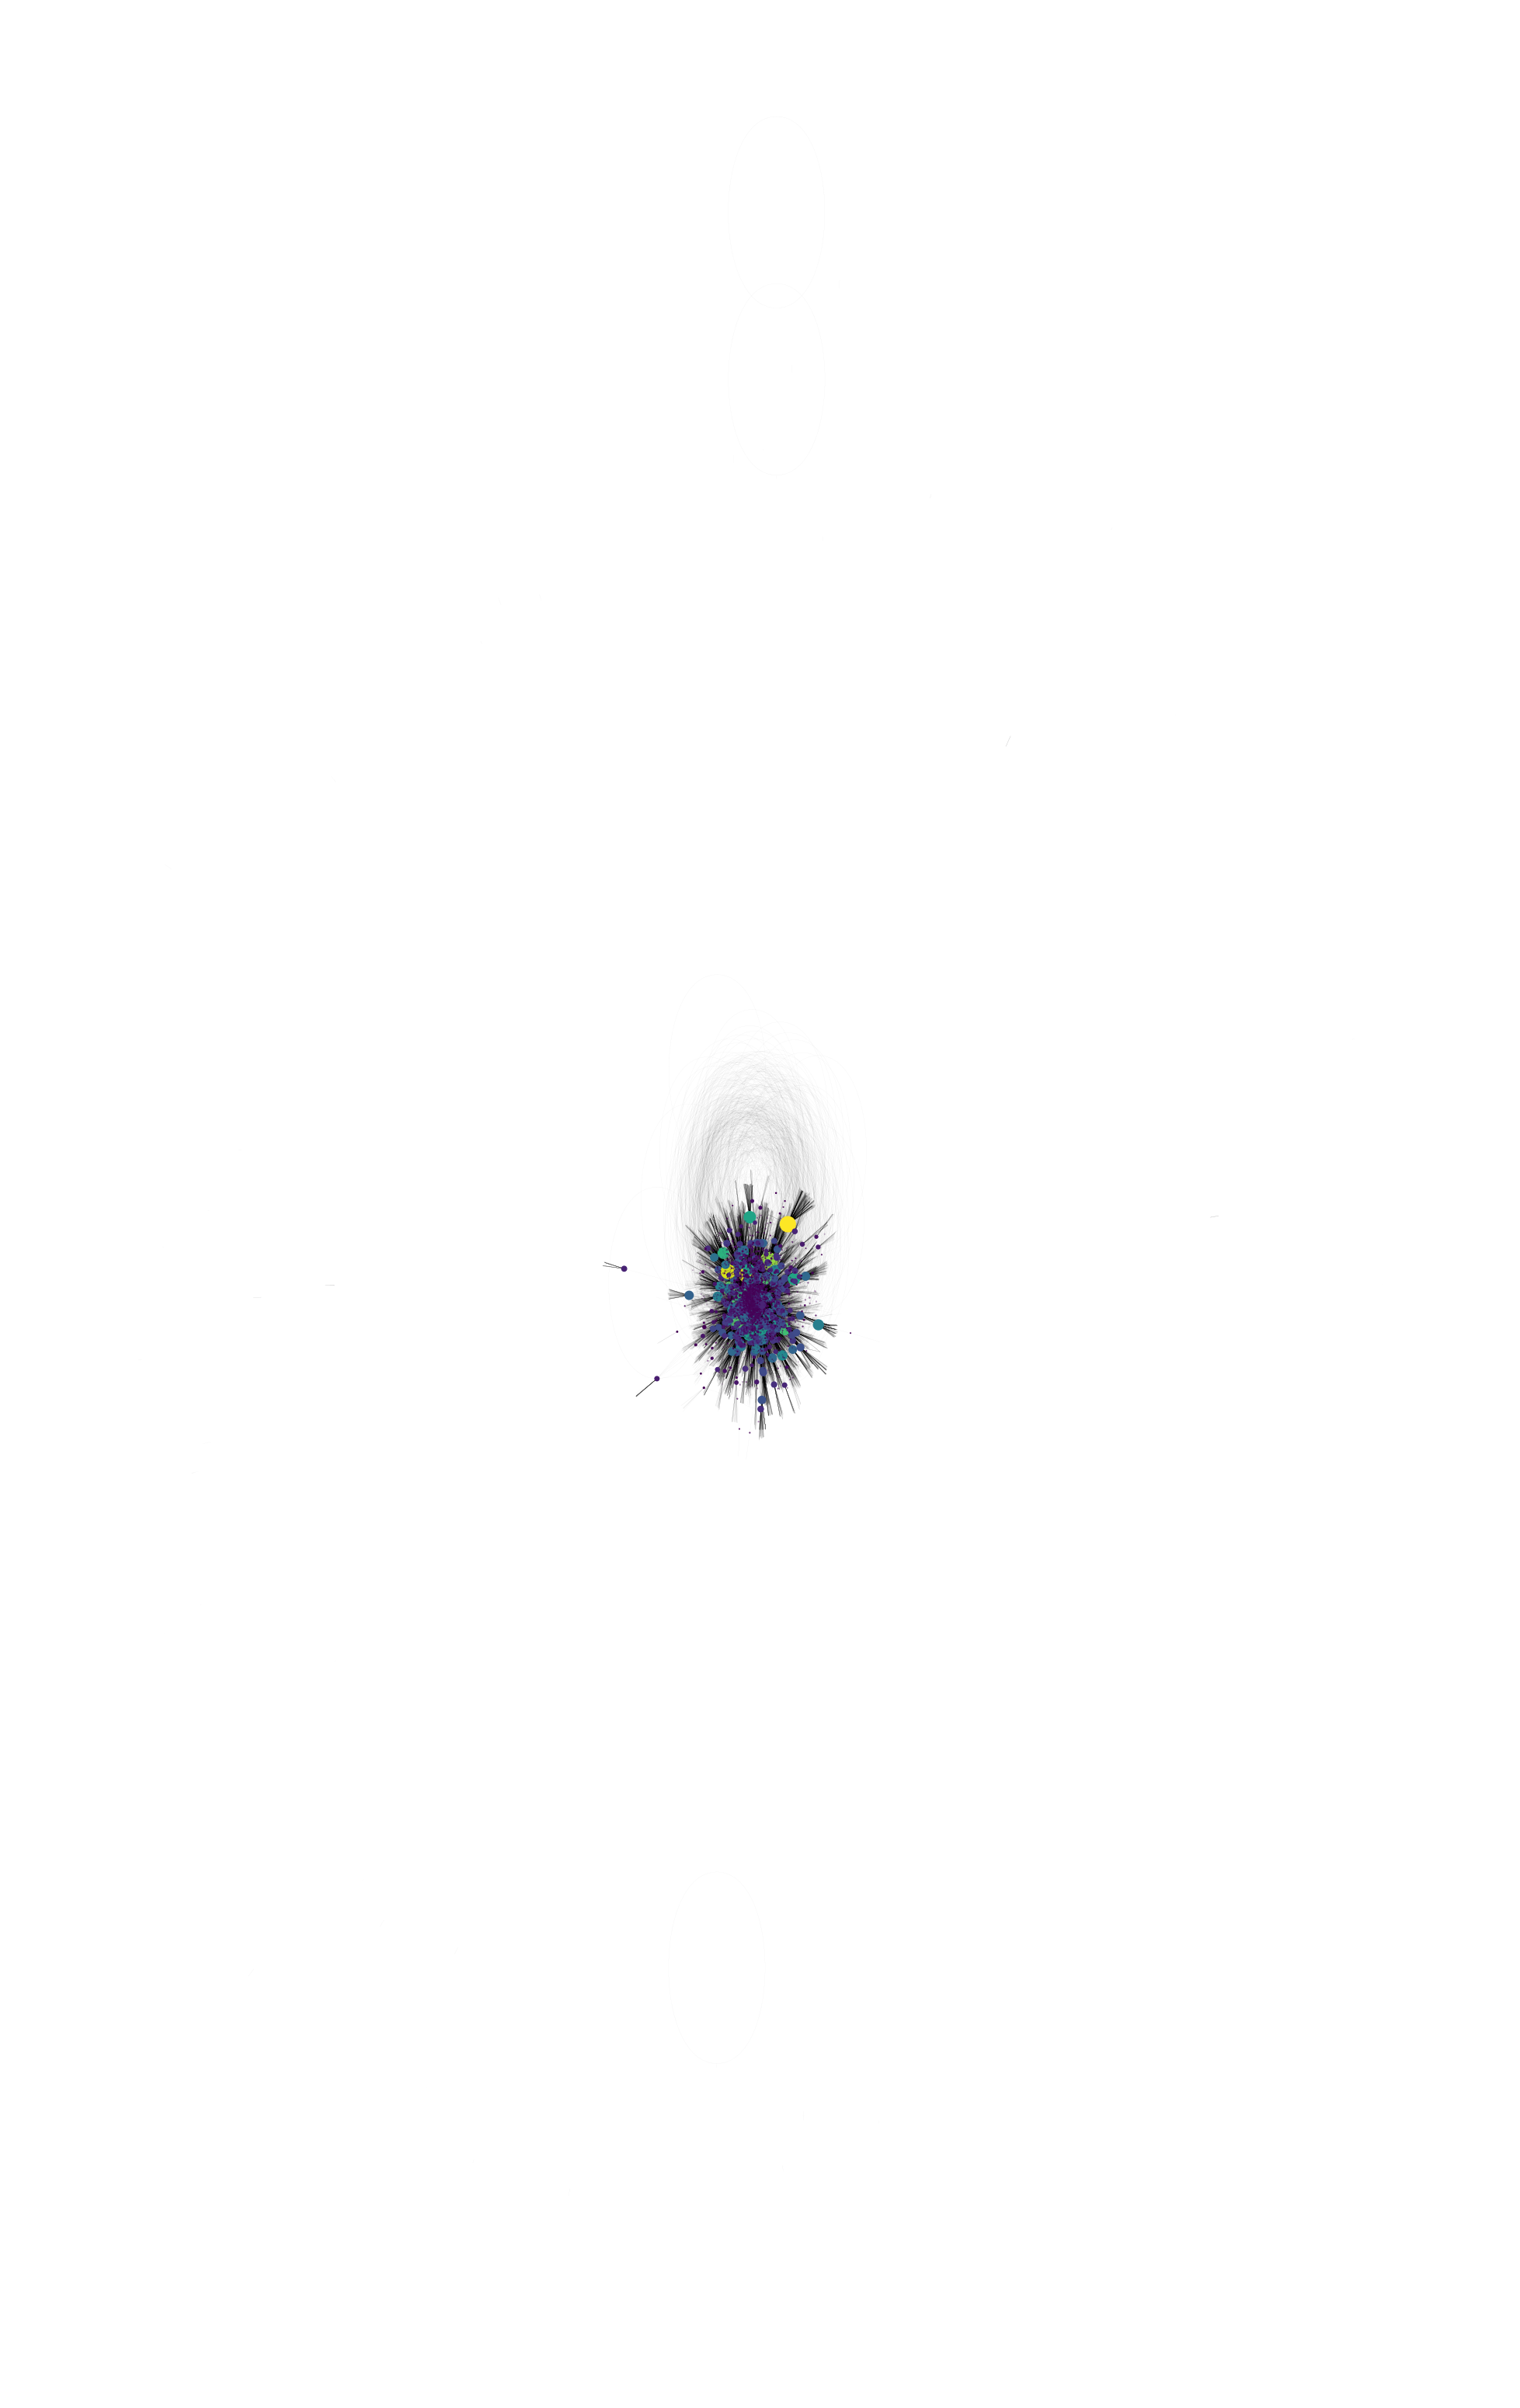

In [146]:
node_color = [1000.0 * G.degree(v) for v in G]
node_size = [
    v * 5000 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(25, 40))
nx.draw_networkx(G, pos=pos, node_size=node_size,node_color=node_color, with_labels=False, width=0.01)
plt.axis("off")

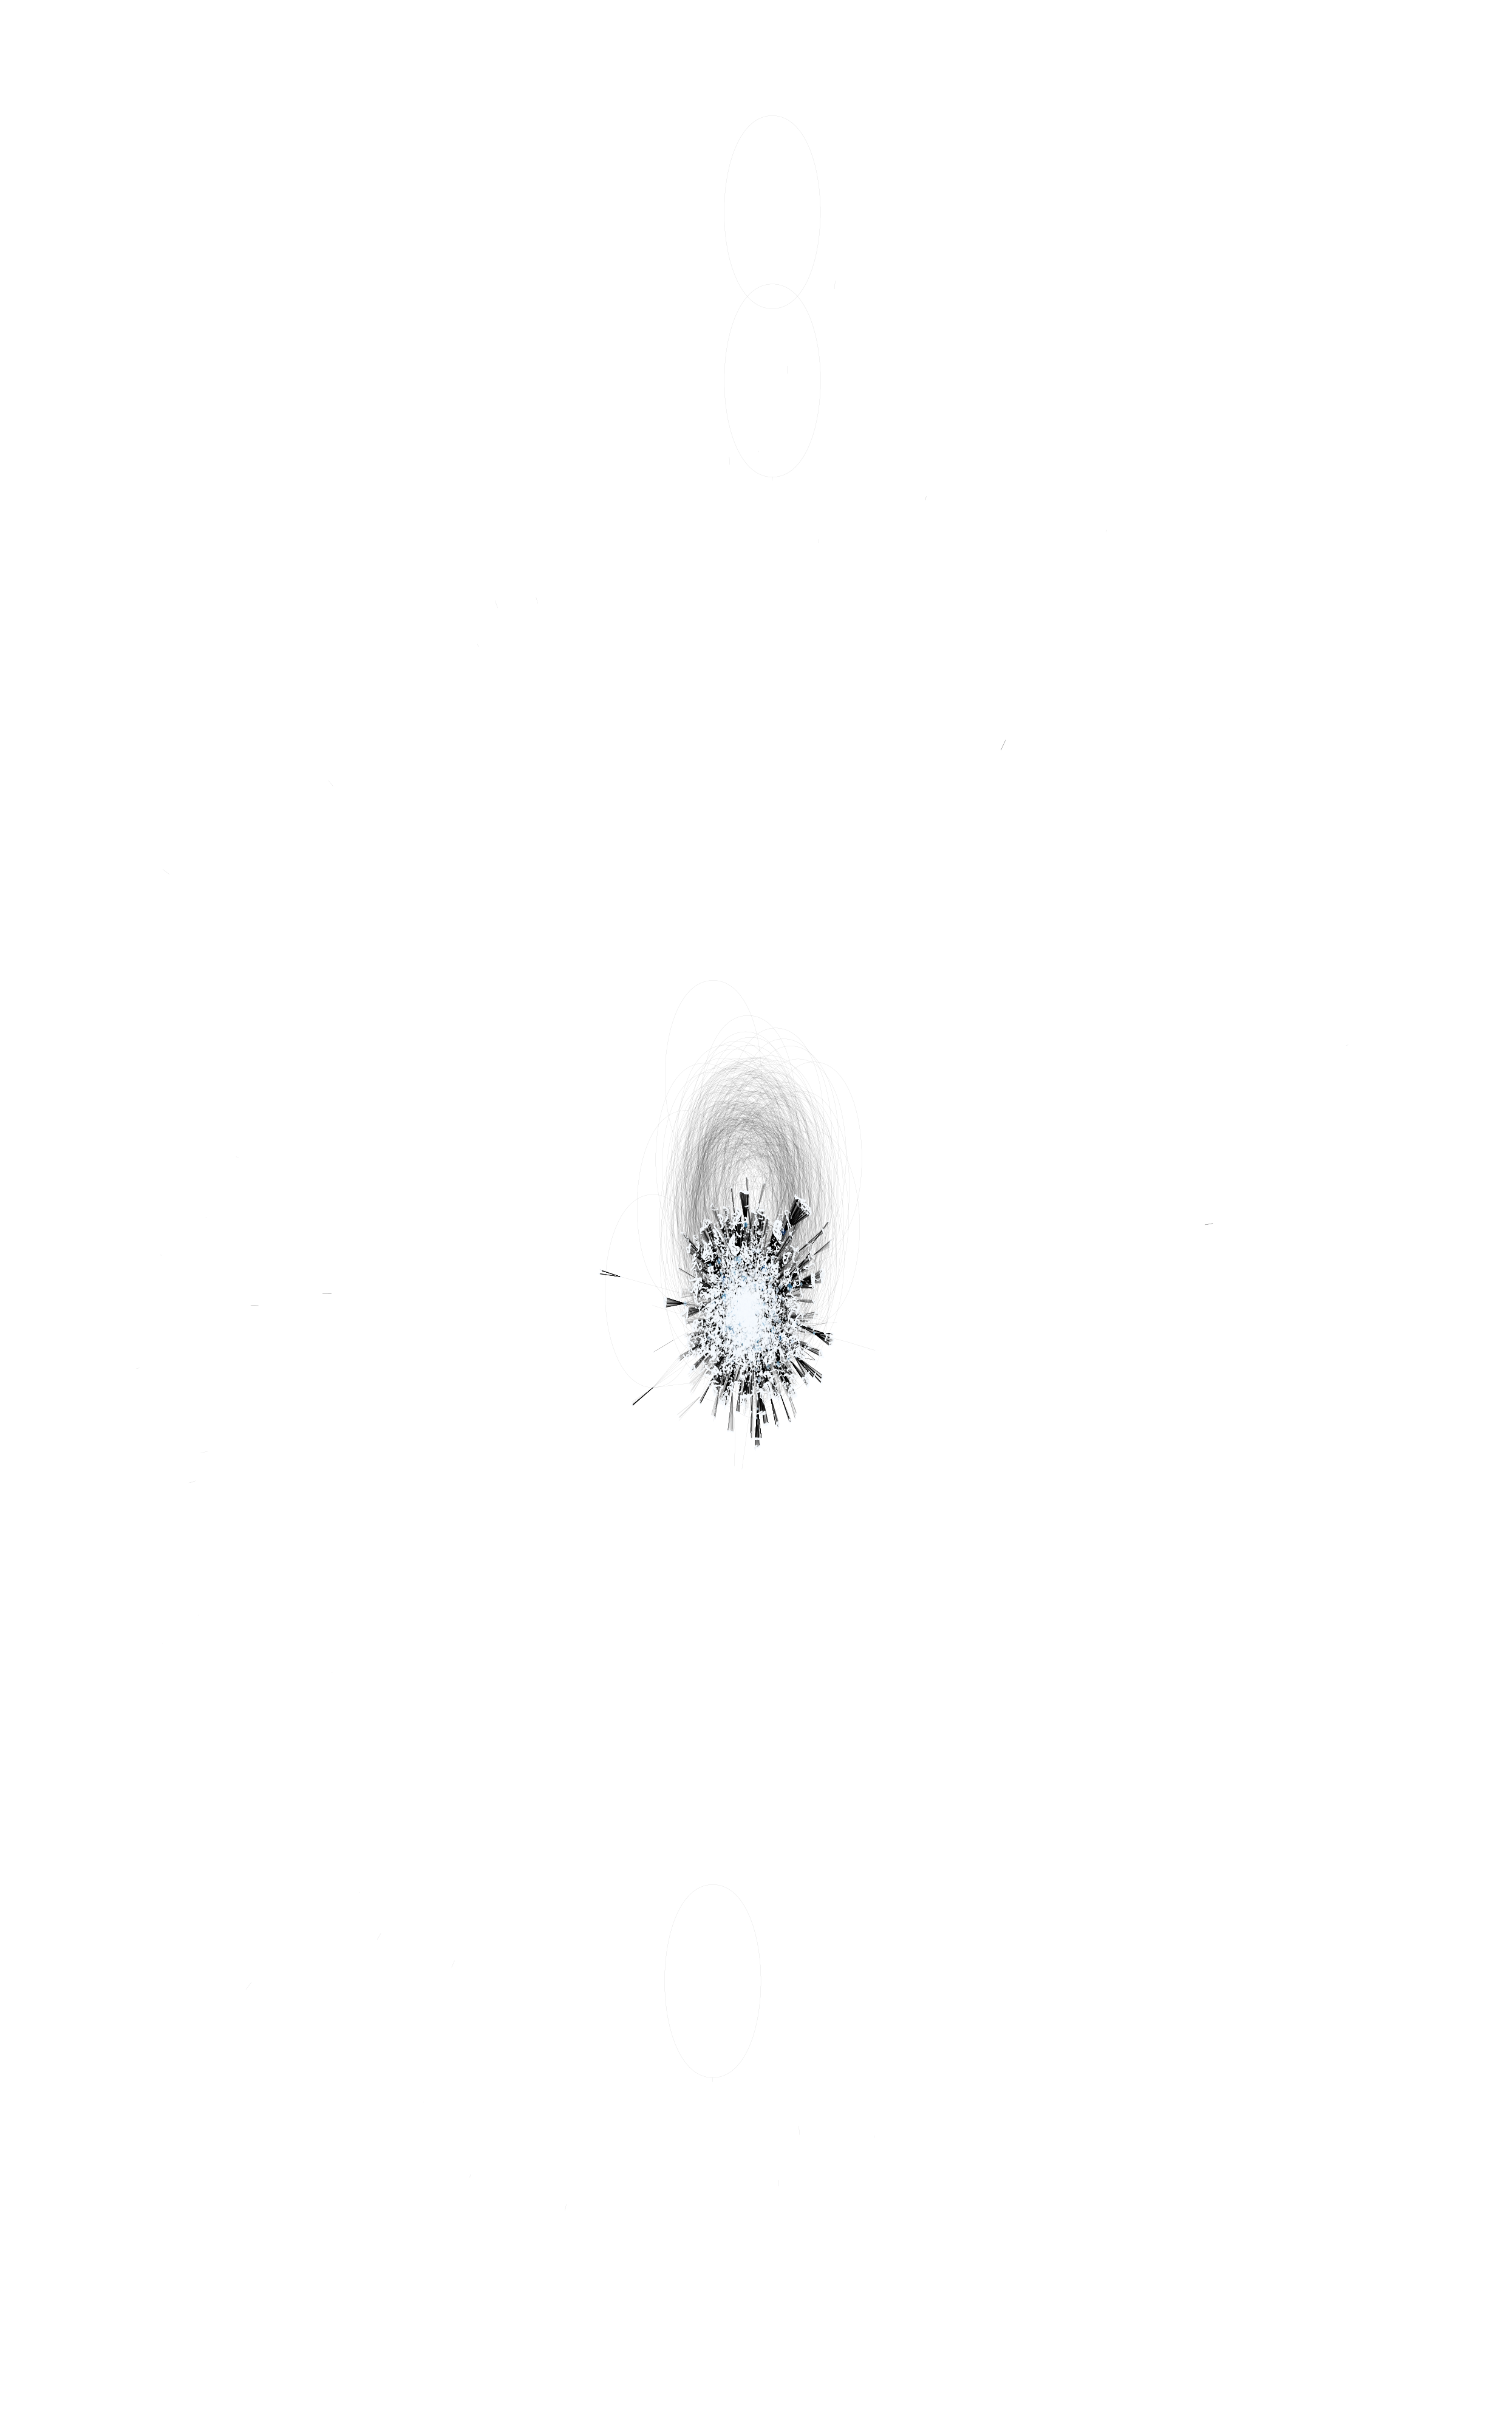

In [167]:
#eigenvector_centrality = nx.eigenvector_centrality(G)


eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

#G_normalized = nx.normalized_graph(G)
#eigenvector_centrality = nx.eigenvector_centrality(G_normalized)




node_color = [10000.0 * G.degree(v) for v in G]
# Set up nodes size for a nice graph representation
node_size = [v * 700 for v in eigenvector_centrality.values()]

# Set up the graph layout


# Plot the graph
plt.figure(figsize=(25, 40))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False,node_color=node_color ,font_size=10, cmap=plt.cm.Blues, width=0.06, alpha=0.6, node_shape="d")

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()

In [158]:
clustering_coefficient = nx.clustering(G)

# Print the clustering coefficient for each node
for node, coefficient in clustering_coefficient.items():
    print(f"Node {node}: Clustering Coefficient = {coefficient}")

avg_clustering_coefficient = nx.average_clustering(G)
print(" average ",avg_clustering_coefficient)

Streaming output truncated to the last 5000 lines.
Node 243351: Clustering Coefficient = 0
Node 243352: Clustering Coefficient = 0
Node 243540: Clustering Coefficient = 0
Node 245377: Clustering Coefficient = 0
Node 245413: Clustering Coefficient = 0
Node 247838: Clustering Coefficient = 0
Node 247843: Clustering Coefficient = 0
Node 247844: Clustering Coefficient = 0
Node 247845: Clustering Coefficient = 0
Node 247846: Clustering Coefficient = 0
Node 247847: Clustering Coefficient = 0
Node 247849: Clustering Coefficient = 0
Node 247851: Clustering Coefficient = 0
Node 247853: Clustering Coefficient = 0
Node 247854: Clustering Coefficient = 0
Node 247856: Clustering Coefficient = 0
Node 247859: Clustering Coefficient = 0
Node 247860: Clustering Coefficient = 0
Node 247864: Clustering Coefficient = 0
Node 247866: Clustering Coefficient = 0
Node 247869: Clustering Coefficient = 0
Node 247870: Clustering Coefficient = 0
Node 247872: Clustering Coefficient = 0
Node 247874: Clustering Coeff